# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

In recent times, we have witnessed a remarkable rise in the competitiveness of the used car market over the new car market.
The preowned cars segment has been gaining field due to the price-benefit balance & reduced depreciation rates.
Another important factor to pick a used car, is the flexibility to negotiate the price and pick from a vast inmensity of possibilities including budget, milage, brand, models, technical capabilities and year of manufacture.

The conventional notion that used cars are unreliable or less appealing has gradually faded away, making room for a new generation of well-informed consumers who understand the immense value and advantages that used cars bring. 

Moreover, in 2019 the semiconductors crisis dramatically increased the selling prices and leadtimes of new cars, which boosted even more the attractiveness of used cars. 

Due to this big market opportunity, for the used car retailer Cars4U,  it is important to determine which independant variables could affect the price of cars in order to maximize the profits of the deals to be done. 



### **The objective:**

 To develop accurate and reliable model based on machine learning, to predict used car prices based on relevant features and historical data, in order to determine the business strategies and tactics, that maximize the profits of the company.  

### **The key questions:**

- Which characteristics of the used cars can influence more in the final selling price? (Eg. Location, Year, Kilometers, Brand, Fuel type, Transmition, etc)
- Which variables could be disregarded of the model? (not significant to the price)
- What positive/negative correlations exist between the x variables in the data and the price?
- If we could predict a Theoretical selling price of a car, considering some input variables, how can the company take advantage of this insights as part of the negotiation strategy during purchasing and selling processes? (Eg. Stablish Roof and Floor of negotiation, prioritize those cars purchased at great discount that can be sold in very good levels)

### **The problem formulation**:
Considering the complexity of the inputs (14 independant variables) and high amount of data (7253 different quotations), analizing and modeling an statistical solution by hand or simpler software tools like Excel  would be improductive or even impossible. For that reason I will use Visual Analisis  for Data Exploration and Machine learning in Python, to build different models that can be trained from iterative runs to propose an optimal solution with good levels of accuracy and precision.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Capstone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

### **Loading libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [2]:
df = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [3]:
# View first 5 rows
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# View last 5 rows Hint: Use tail() method
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights: ** <br>
Name Feature seems to be a very large string to be processed. I might need to separate in different columns like: Brand, Model and Year

Most of the cars don't have a new_price feature. This could be due to lost information, obsolecense of the model, or other reasons. 

In similar way, some cars don't have a target price yet. So this is something that has to be handled during the analisis.

### **Let us check the data types and and missing values of each column** 

In [5]:
# Check the datatypes of each column. Hint: Use info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
# Check total number of missing values of each column. Hint: Use isnull() method
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

*Observations* <br>




In [7]:
df.duplicated().sum()

0

No duplicated values

In [8]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

**Observations and Insights: ** <br>
New_price is almost an empty column (only 6247/7253 values are null). I'm already thinking in droping this column
Special treatment might be to estimate missing values of Milage, Engine, POwer, Seats and Price.

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [9]:
# Remove S.No. column from data. Hint: Use inplace = True
df.drop('S.No.', axis=1, inplace=True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [10]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations and Insights:**

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [11]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 

df.describe(include="object").T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [12]:
cat_cols = df.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(df[column].value_counts())
    
    print('-'*60)

For column: Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
------------------------------------------------------------
For column: Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
------------------------------------------------------------
For column: Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric   

#### **Observations and Insights: ** <br>

Aproximately 50% of the cars are between 2011 and 2016. The oldest car was manufactured in 2011 and teh newest in 2019.

most of the cars seem to have a record of 34,000 to 73,000 kilometers driven. But there is one number that includes 6,500,000 kilometers driven, which seems to be a typo.

Most of the cars have 5 seats

50% of the data shows a price between 3.5 and 9.95 INR.

Most popular car is Mahindra XUV500 W8 2WD .

Diesel and Petrol are the most popular energy drivers.
Manual transmition is the most popular mechanism to activate the power of the car.
Most of the cars only have one owner previous to the sale.


**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [13]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
df.sort_values("Kilometers_Driven", ascending=False).head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.0
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.5
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.9
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.7
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.0


#### **Observations and Insights: _____**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [14]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
df.drop(2328, inplace=True)

**Check Mileage extreme values**

In [15]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
df.sort_values("Mileage", ascending=True).head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN


#### **Observations**
* More than 10 rows have a milage on 0. To be exact, 81 rows!!!!
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [16]:
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Create a boxplot and histogram combined for a numerical variable.
    
    feature: 1D numerical array or pandas Series
        Input numerical variable for visualization.
        
    figsize: tuple, optional (default: (15, 10))
        Size of the figure.
        
    bins: int or str or array_like, optional (default: None)
        Number of bins for the histogram.
    """
    f, (ax_box, ax_hist) = plt.subplots(2, 1, gridspec_kw={"height_ratios": (.25, .75)}, figsize=figsize)

    sns.boxplot(feature, ax=ax_box, showmeans=True, color='violet')
    ax_box.set(xlabel='')  # Remove x-axis label from the boxplot

    if bins is None:
        sns.histplot(feature, ax=ax_hist, kde=False, palette="winter")
    else:
        sns.histplot(feature, bins=bins, ax=ax_hist, kde=False, palette="winter")
    
    ax_hist.axvline(feature.mean(), color='green', linestyle='--')
    ax_hist.axvline(feature.median(), color='black', linestyle='-')

    plt.show()

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

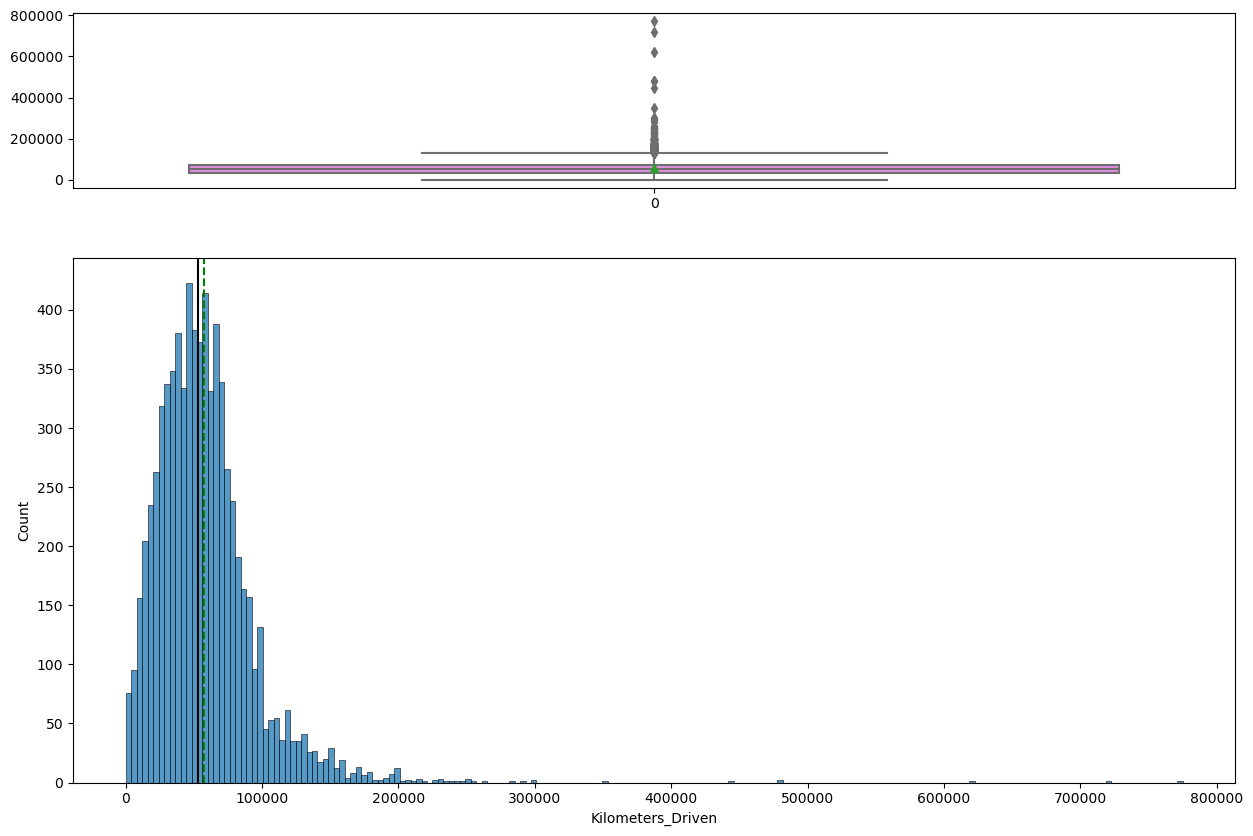

In [17]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(df['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

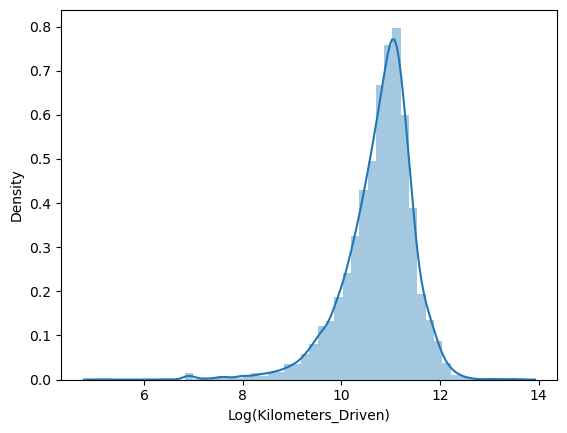

In [18]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(df["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights:** <br>

Violation of Assumptions: Skewed data violates the assumption of normal distribution required by many statistical tests and models, potentially leading to incorrect conclusions and biased results.

Model Performance Impact: Skewed data can adversely affect the performance of certain machine learning algorithms and statistical models. Models assuming normality or linear relationships may perform poorly with skewed data, resulting in inaccurate predictions and biased parameter estimates.

Outlier Influence: Skewed data often includes outliers or extreme values in the long tail. These outliers can have a disproportionate impact on the analysis or model fitting process, introducing bias and overemphasizing extreme values.

**By applying a log transformation, you can compress the scale of large values and reduce the right skewness. This transformation can make the data more suitable for analysis and modeling, as it can help meet the assumptions of certain techniques.**

In [19]:
# We can add a transformed kilometers_driven feature in data
df["Kilometers_Driven_log"] = np.log(df["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

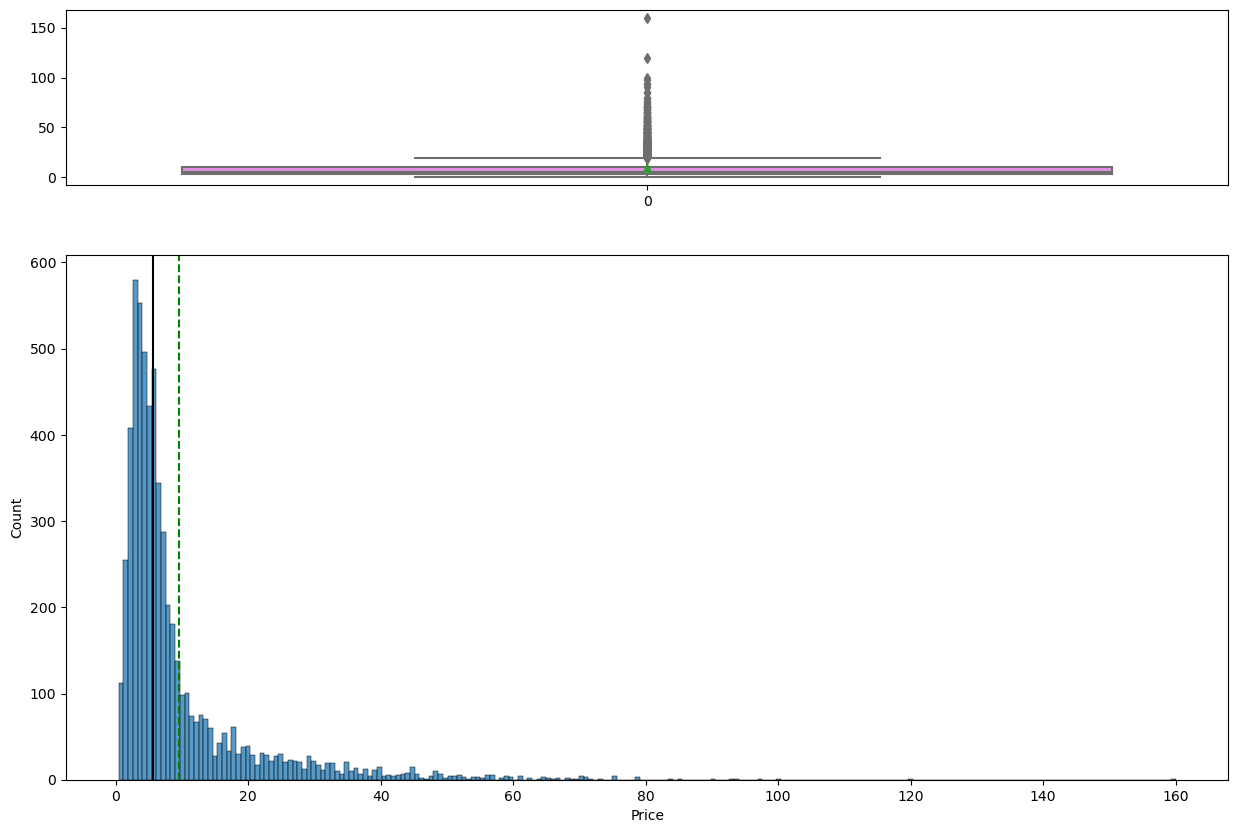

In [20]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(df['Price'])

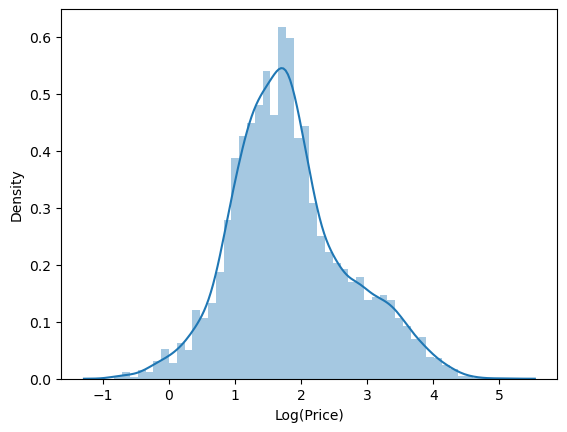

In [21]:
# Log transformation of the feature 'Price'

sns.distplot(np.log(df["Price"]), axlabel = "Log(Price)");

In [22]:
# We can Add a transformed Price feature in data
df["Price_log"] = np.log(df["Price"])

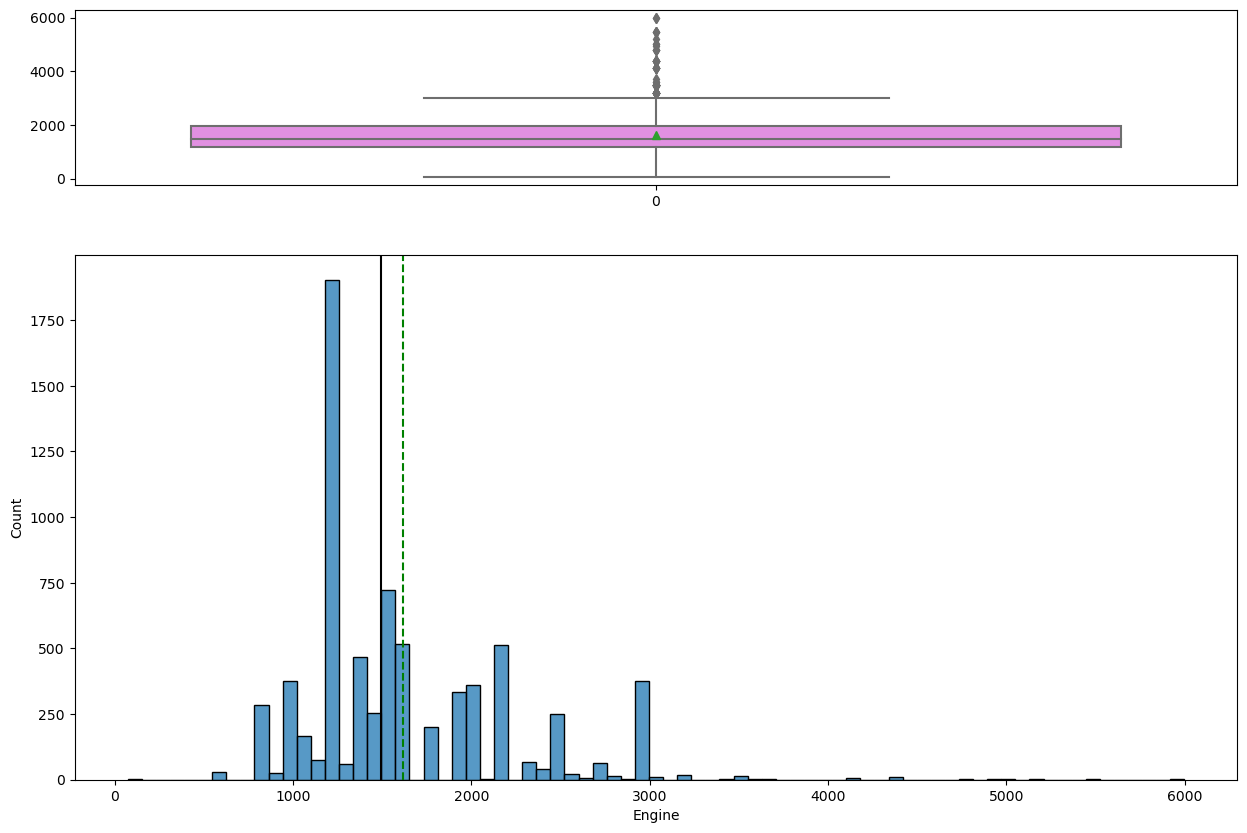

In [23]:
histogram_boxplot(df['Engine'])

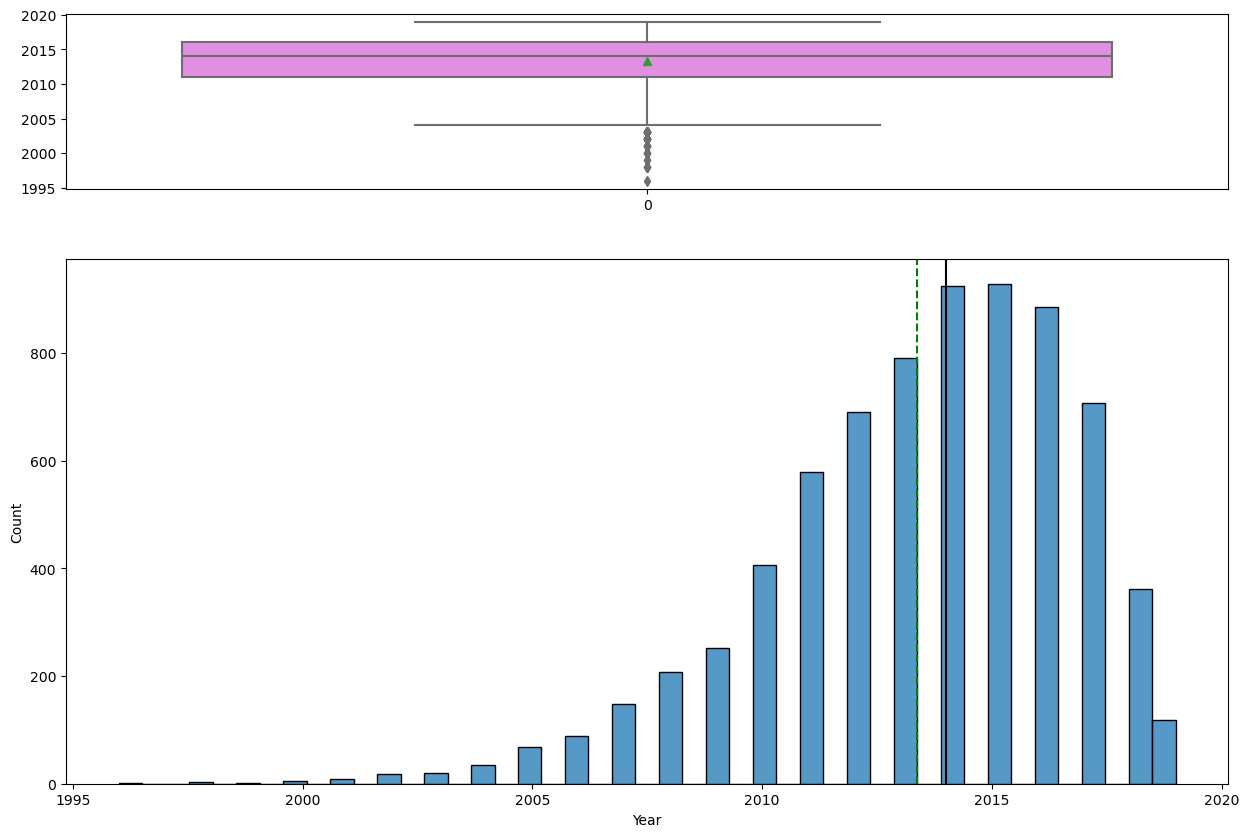

In [24]:
histogram_boxplot(df['Year'])

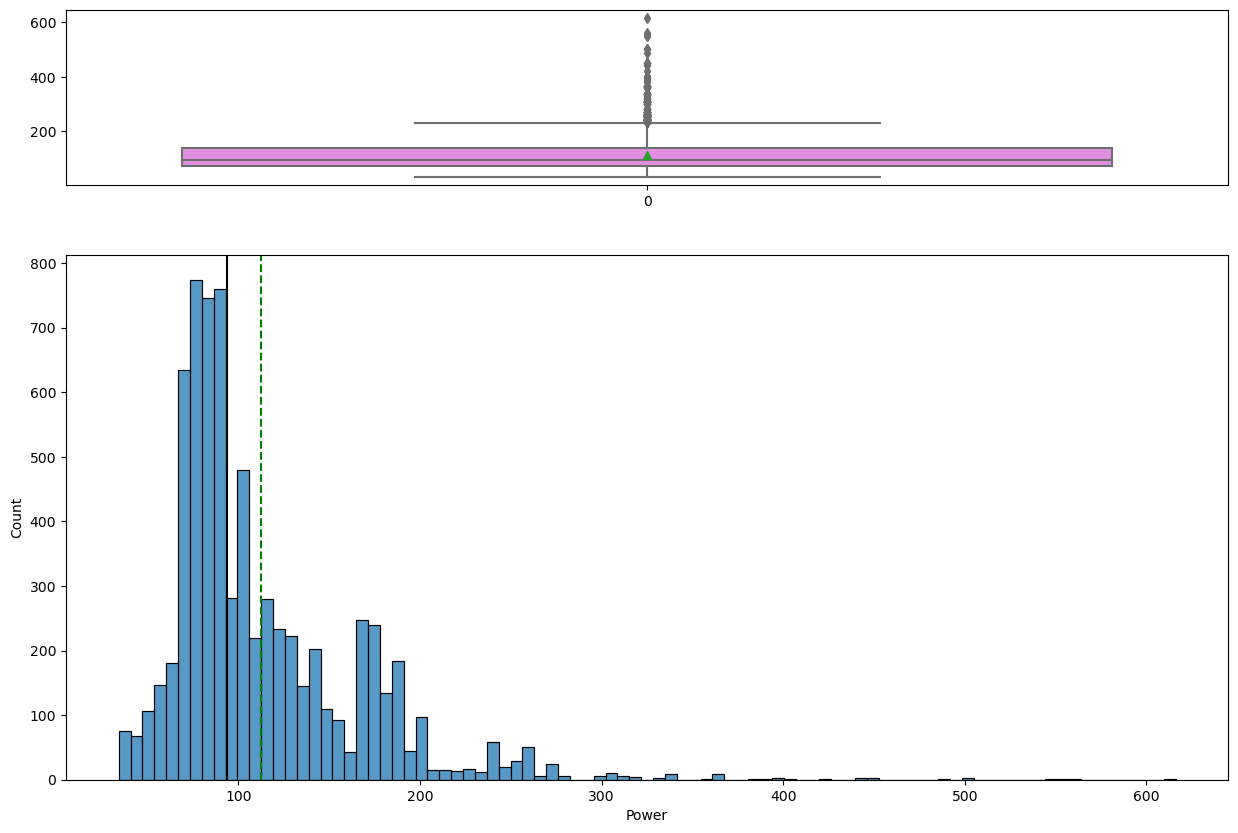

In [25]:
histogram_boxplot(df['Power'])

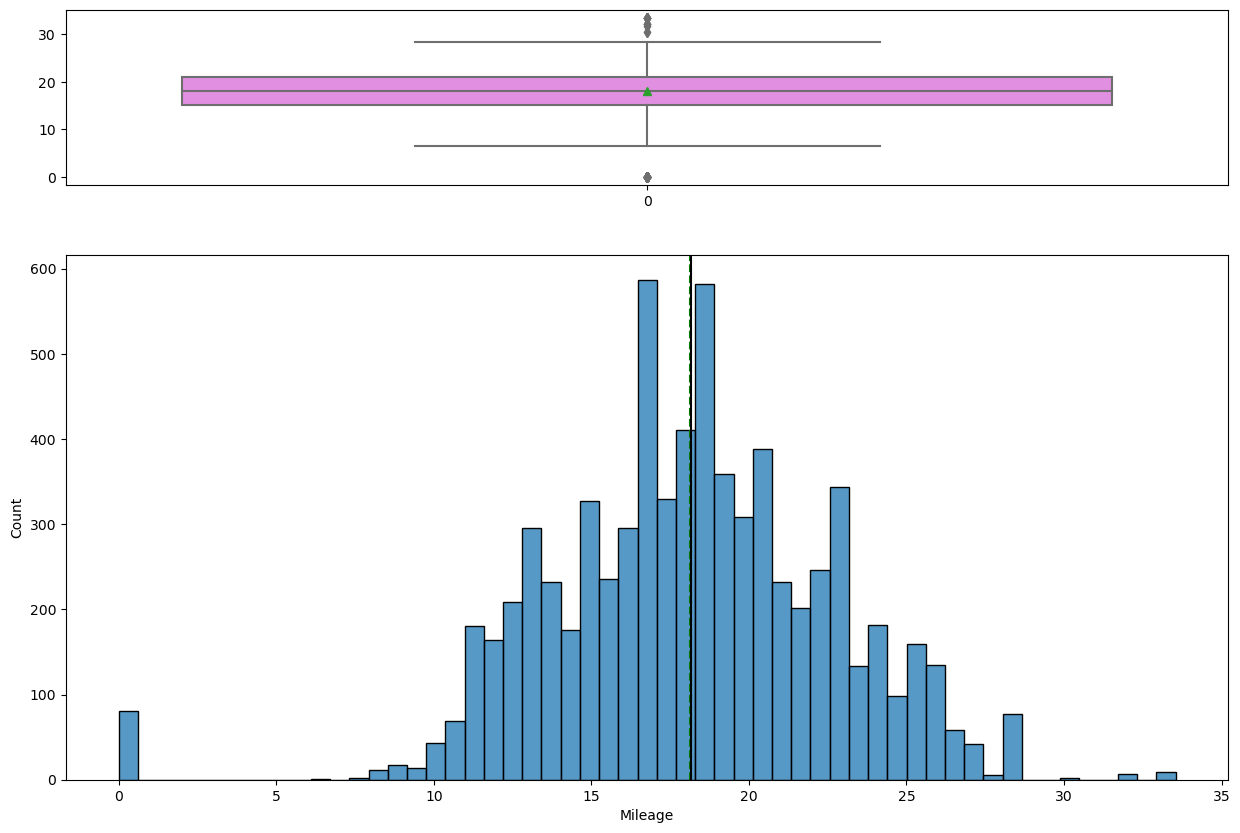

In [26]:
histogram_boxplot(df['Mileage'])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

**Observations and Insights for all the plots:**<br>
Year, Power and engine also will be normalized with a log function since they seem to be skewed

In [27]:
df["Year_log"] = np.log(df["Year"])
df["Power_log"] = np.log(df["Power"])
df["Engine_log"] = np.log(df["Engine"])

## **2. Univariate analysis - Categorical Data**

In [28]:
def categorical_barplot_with_percentage(data, column, figsize=(10, 6)):
    """Create a bar plot with percentage annotations for a categorical column.
    
    data: DataFrame
        Input DataFrame containing the categorical column.
        
    column: str
        Name of the categorical column to visualize.
        
    figsize: tuple, optional (default: (10, 6))
        Size of the figure.
    """
    plt.figure(figsize=figsize)
    
    total_count = data[column].value_counts().sum()
    category_counts = data[column].value_counts()
    category_percentages = category_counts / total_count * 100
    
    ax = sns.barplot(x=category_counts.index, y=category_counts.values)
    
    # Add percentage annotations to the bars
    for p, percentage in zip(ax.patches, category_percentages):
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {column} with Percentage')
    plt.xticks(rotation=90)
    
    plt.show()

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

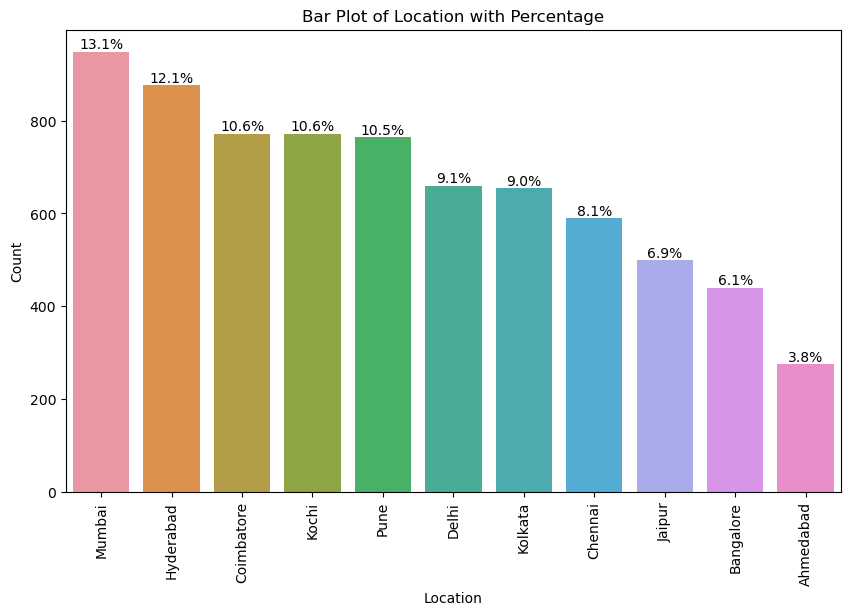

In [29]:
categorical_barplot_with_percentage(df, 'Location')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

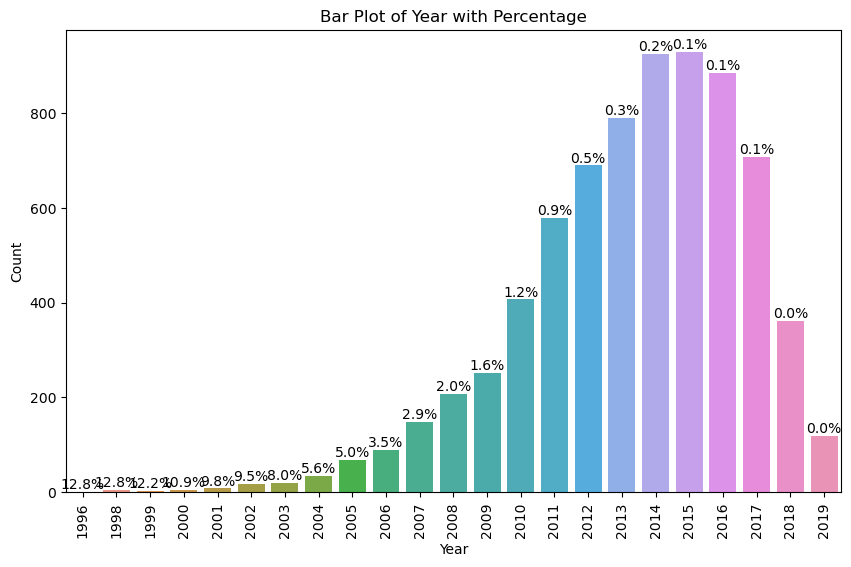

In [30]:
categorical_barplot_with_percentage(df, 'Year')

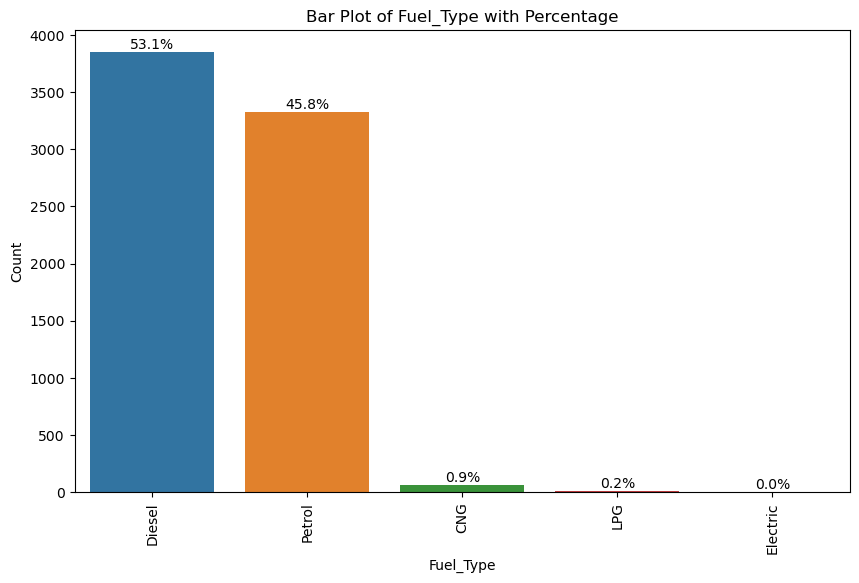

In [31]:
categorical_barplot_with_percentage(df, 'Fuel_Type')

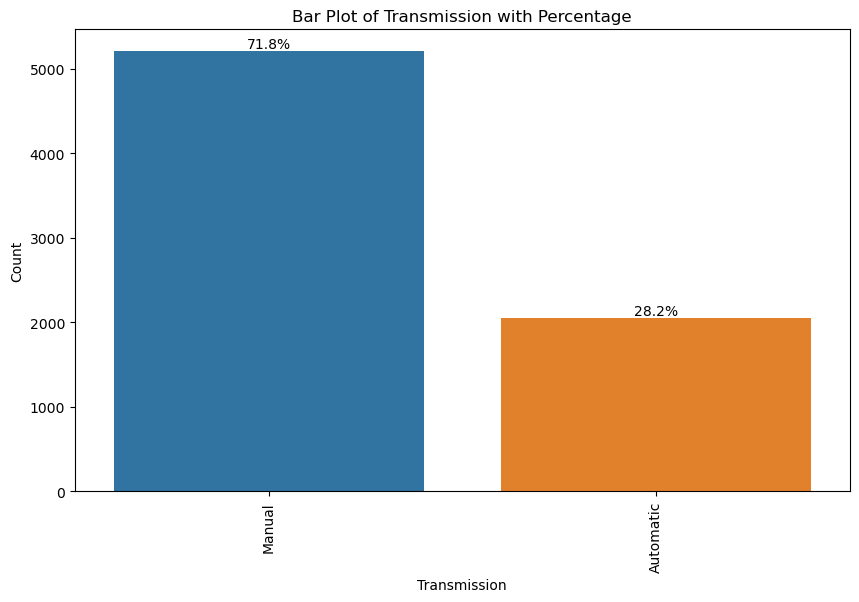

In [32]:
categorical_barplot_with_percentage(df, 'Transmission')

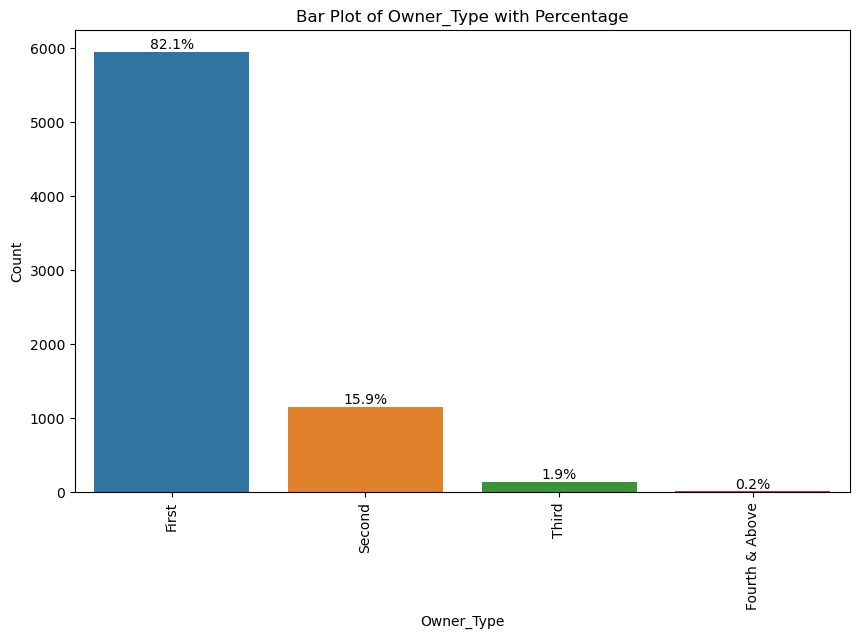

In [33]:
categorical_barplot_with_percentage(df, 'Owner_Type')

**Observations and Insights from all plots:** <br>
Findings are similar to the descriptive analysis done previously. But having this as a graph makes the understanding way more clear.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<Axes: xlabel='Year'>

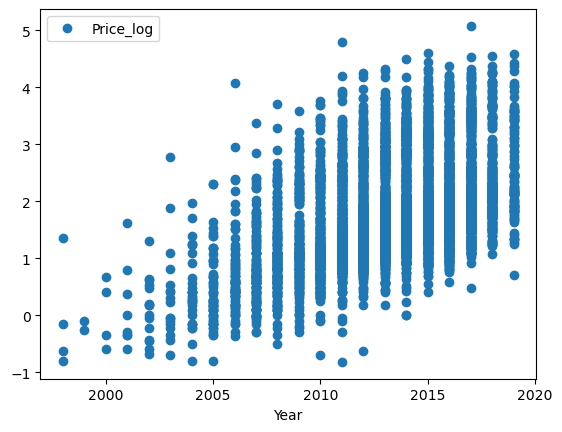

In [34]:
# Let us plot pair plot for the variables 'year' and 'price_log'
df.plot(x ='Year' , y ='Price_log', style = 'o' )

<Axes: xlabel='Kilometers_Driven'>

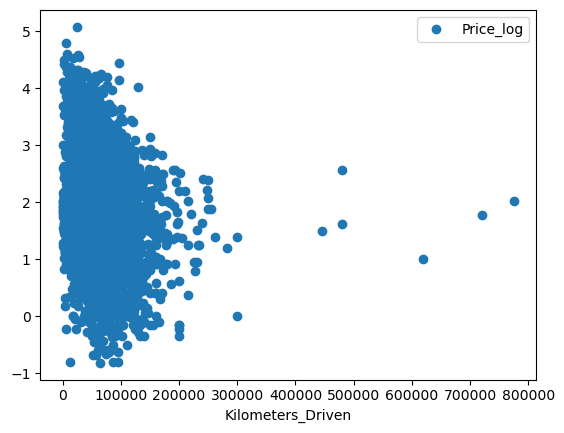

In [35]:
df.plot(x ='Kilometers_Driven' , y ='Price_log', style = 'o' )

<Axes: xlabel='Mileage'>

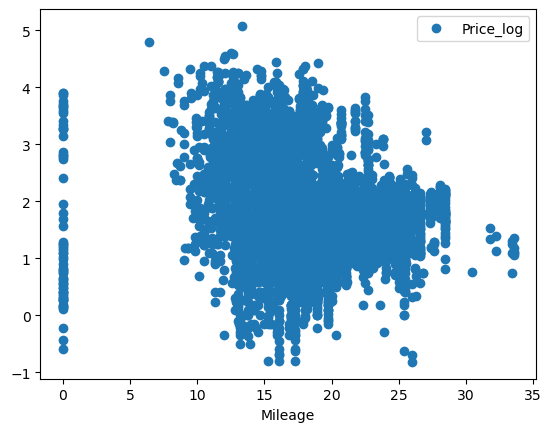

In [36]:
df.plot(x ='Mileage' , y ='Price_log', style = 'o' )

<Axes: xlabel='Engine'>

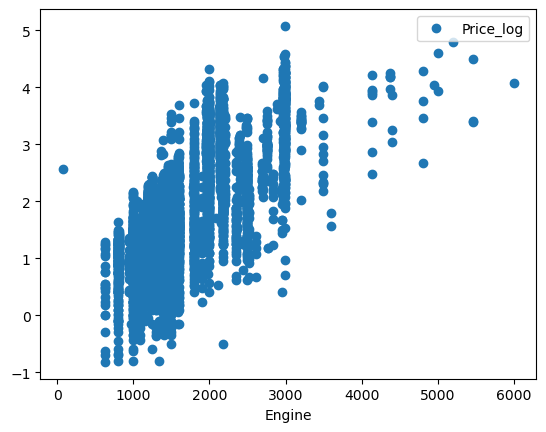

In [37]:
df.plot(x ='Engine' , y ='Price_log', style = 'o' )

<Axes: xlabel='Power'>

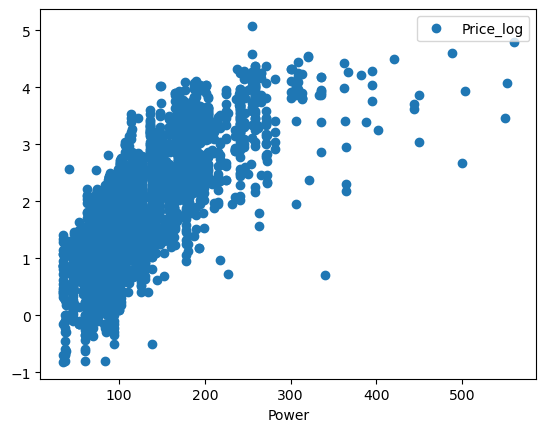

In [38]:
df.plot(x ='Power' , y ='Price_log', style = 'o' )

<Axes: xlabel='Seats'>

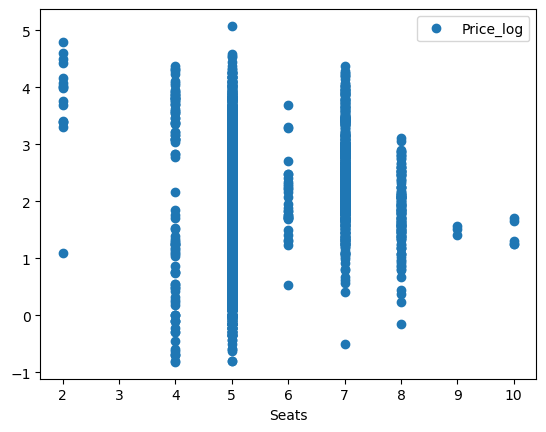

In [39]:
df.plot(x ='Seats' , y ='Price_log', style = 'o' )

<Axes: xlabel='New_price'>

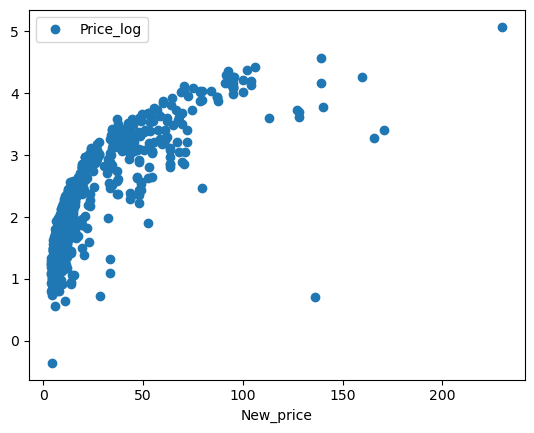

In [40]:
df.plot(x ='New_price' , y ='Price_log', style = 'o' )

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

**Observations and Insights from all plots:** <br>

In general I can see some patters in the input variables Year, Engine, Power, New_Price. For the rest of the variables the pattern is unclear. However it will be nice to do a heatmap and review correlations to see how those affect the price

### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

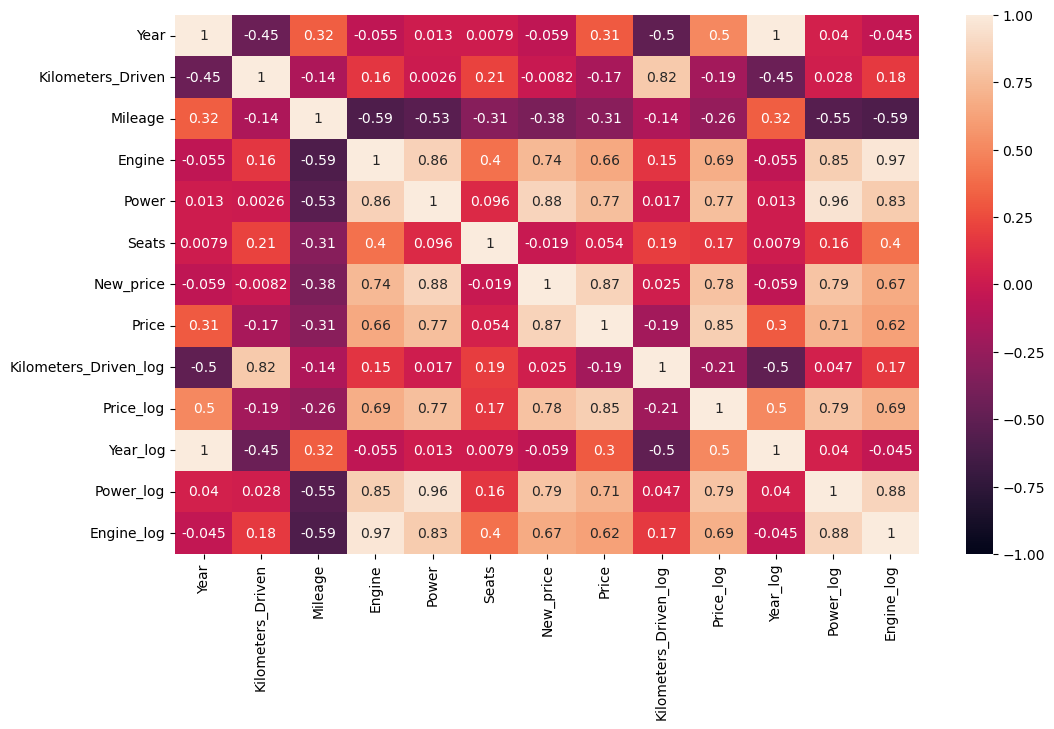

In [41]:
plt.figure(figsize = (12, 7))

sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

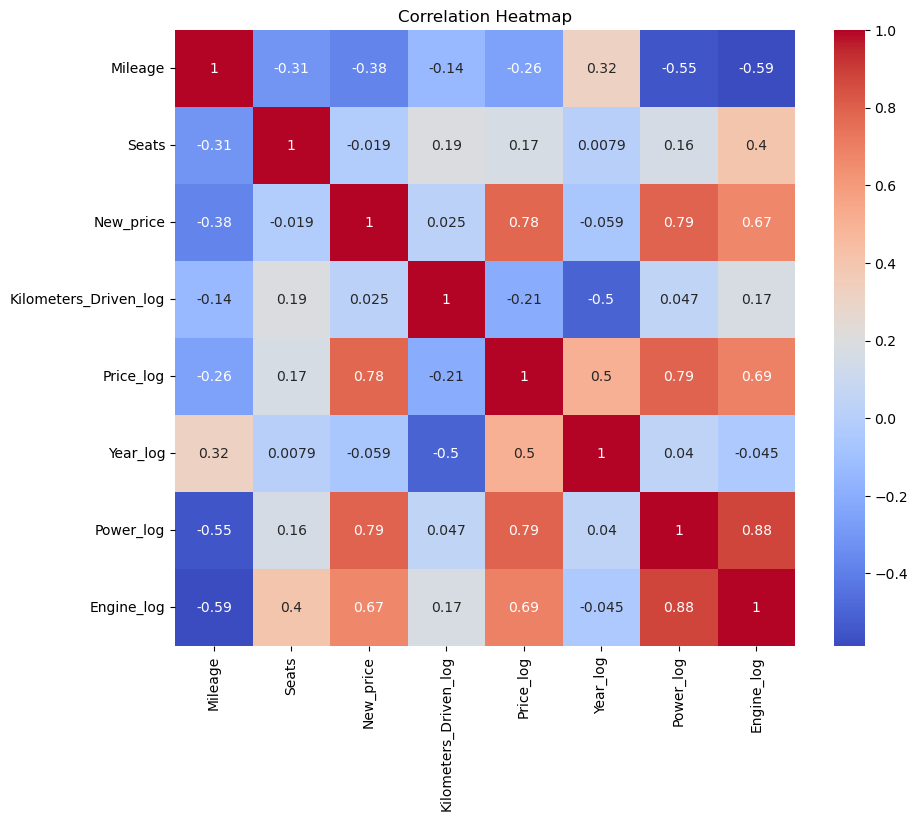

In [42]:
# We can include the log transformation values and drop the original skewed data columns
df_transformed = df.drop(['Kilometers_Driven', 'Price', 'Year', 'Power', 'Engine'], axis=1)
correlation_matrix = df_transformed.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

**Observations and Insights:**
- Milage is correlated negatively with Power and Engine, the gasoline will finish earlier when the power is higher or the engine is higher.
- The price of a new car is correlate positively with the price of the same car but older version.
- Also Price is correlated positively with Engine and Power, cars with bigger motors and performance will be more expensive.
- Kilometers are negatively correlated to Year of the car, the newest the lowest kilometers driven.

In [43]:
# sns.pairplot(df, hue="Price_log")
# plt.show()

### **3. Box plot**

In [44]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = df['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = df['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

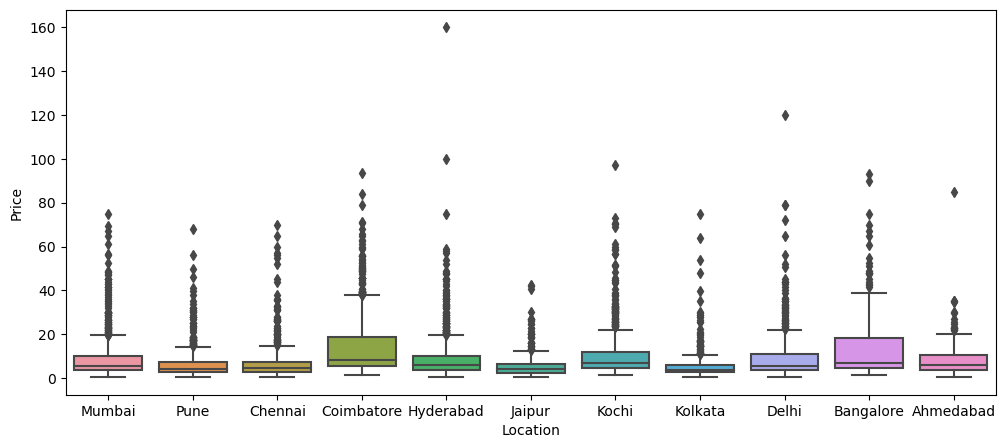

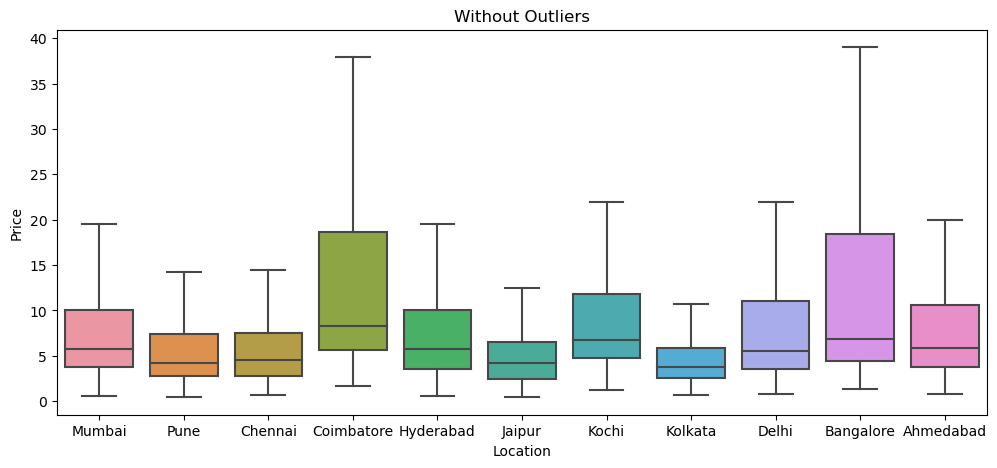

In [45]:
# Box Plot: Price vs Location
boxplot(df['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

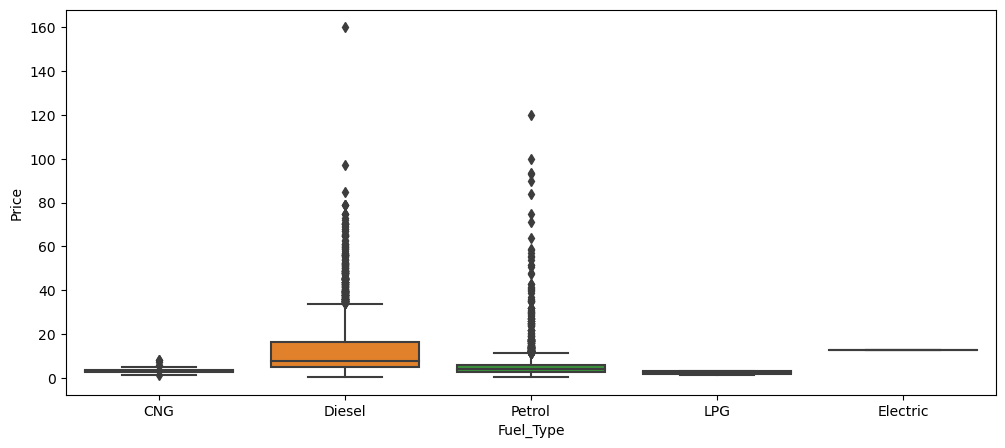

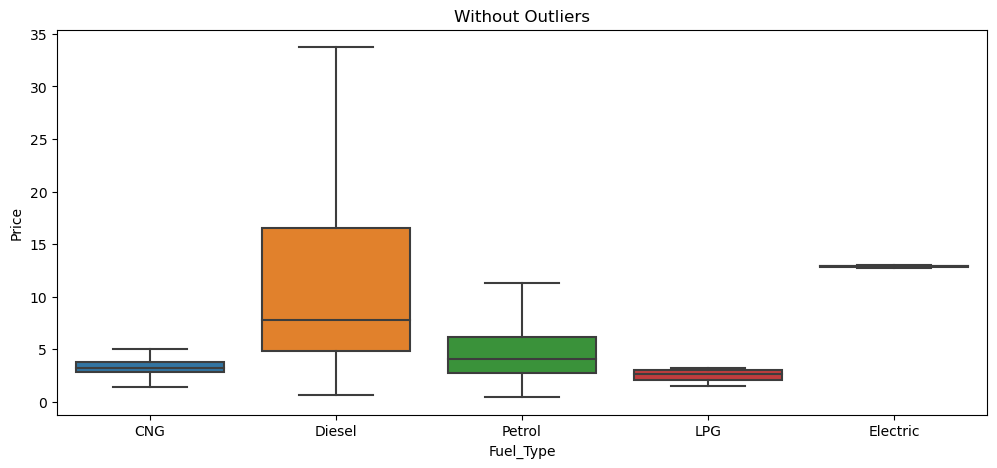

In [46]:
boxplot(df['Fuel_Type'])

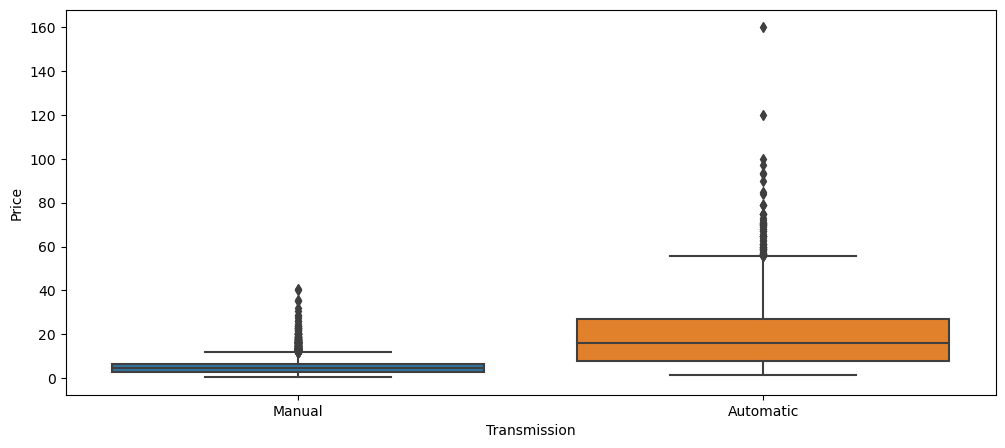

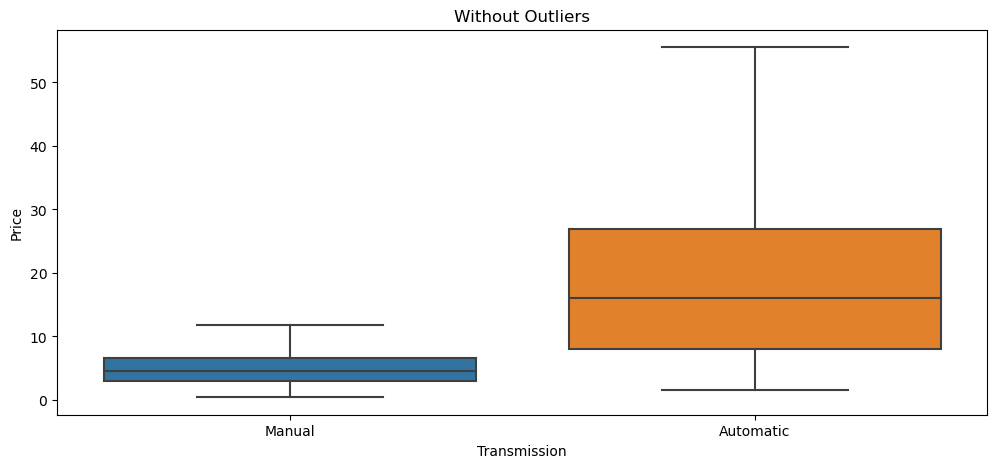

In [47]:
boxplot(df['Transmission'])

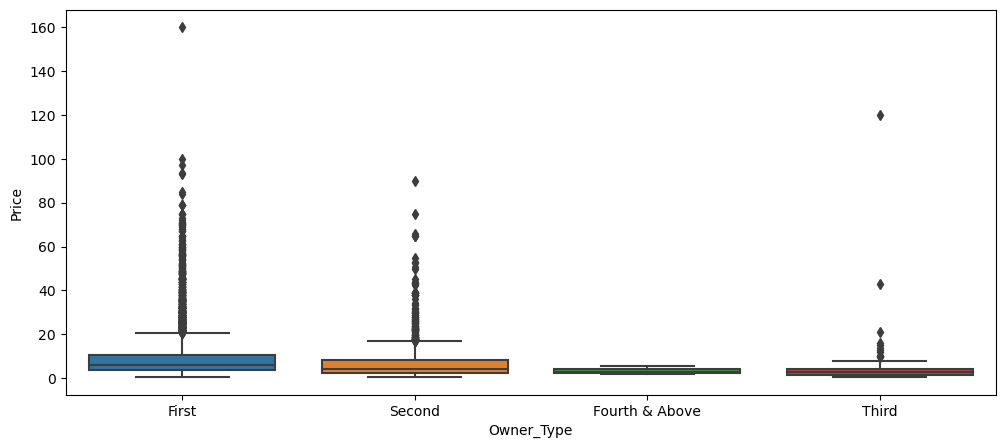

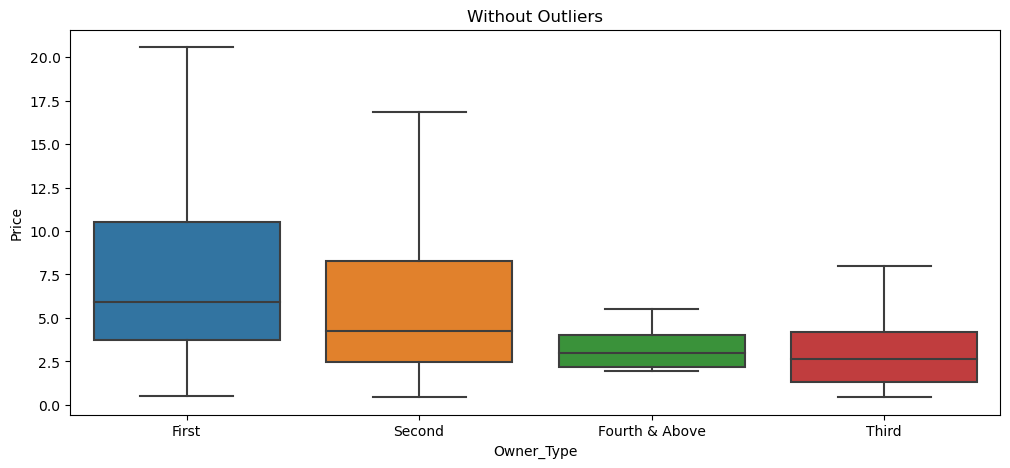

In [48]:
boxplot(df['Owner_Type'])

**Observations and Insights for all plots:**
- Coimbatore and Bangalore are 2 cities where the cars are generally more expensive.
- Diesel cars are generally more expensive than others.
- Automatic cars are normally more expensive than manual cars.
- Cars with that were only pre-owned once, will be sold at a better price

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

In [49]:
df["Name"].nunique()

2041

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [50]:
# Extract Brand Names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())

In [51]:
# Extract Model Names
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1].lower())

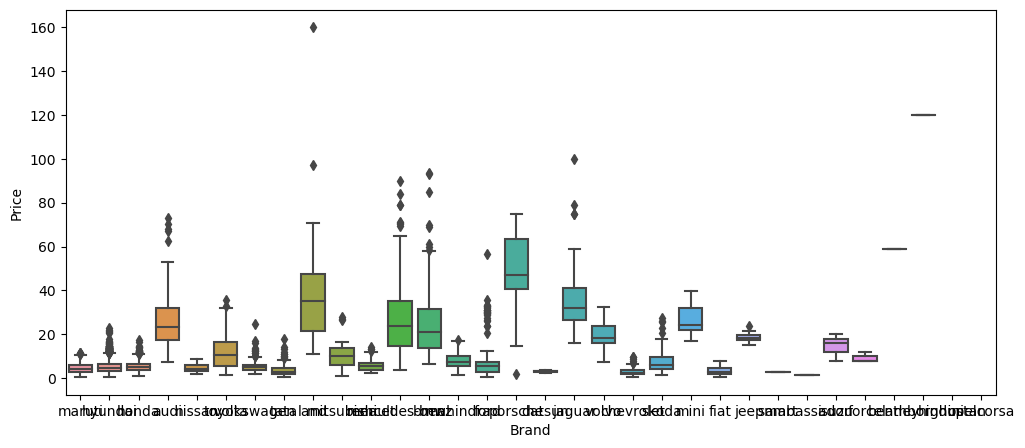

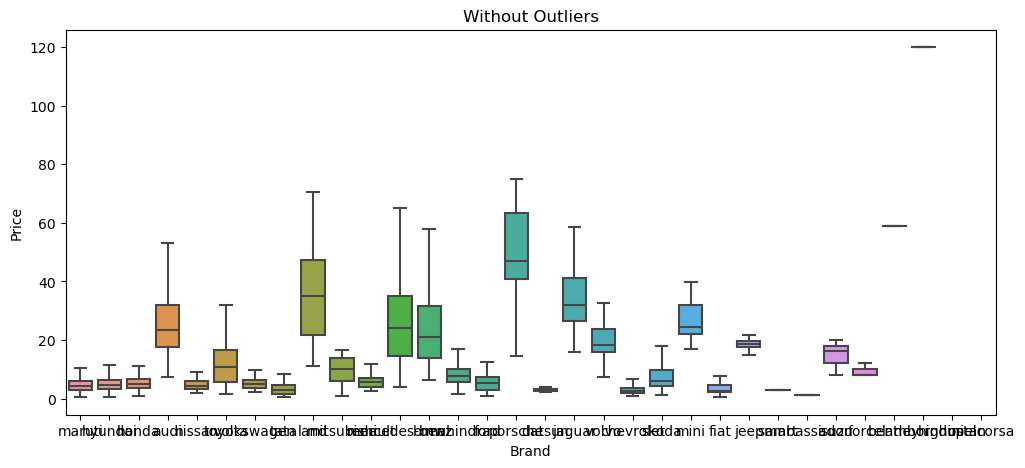

In [52]:
boxplot(df['Brand'])

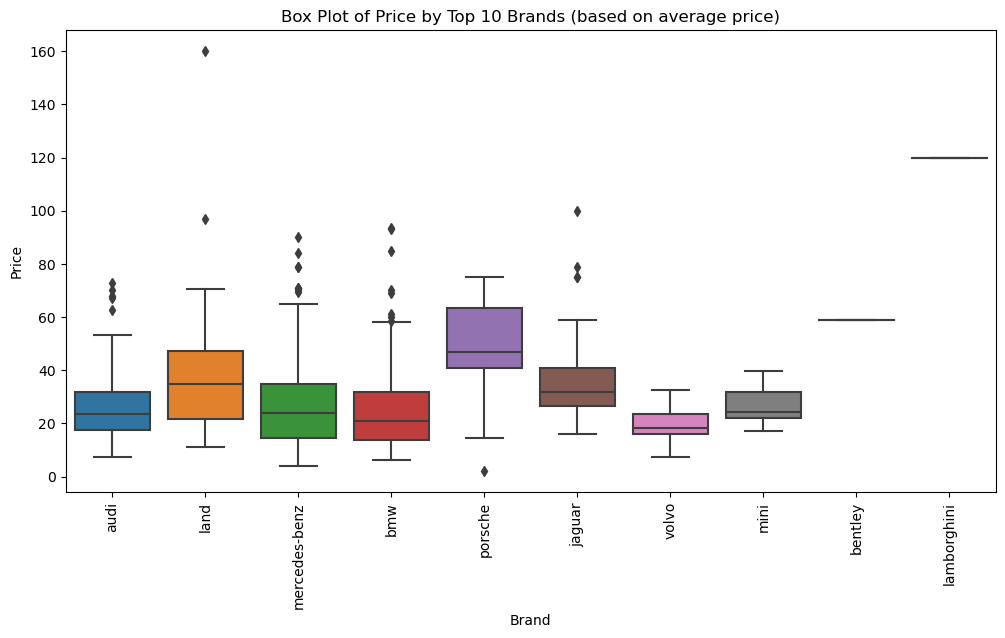

In [53]:
top_10_brands = df.groupby('Brand')['Price'].mean().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x=df[df['Brand'].isin(top_10_brands)]['Brand'], y=df['Price'])
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Box Plot of Price by Top 10 Brands (based on average price)')
plt.show()

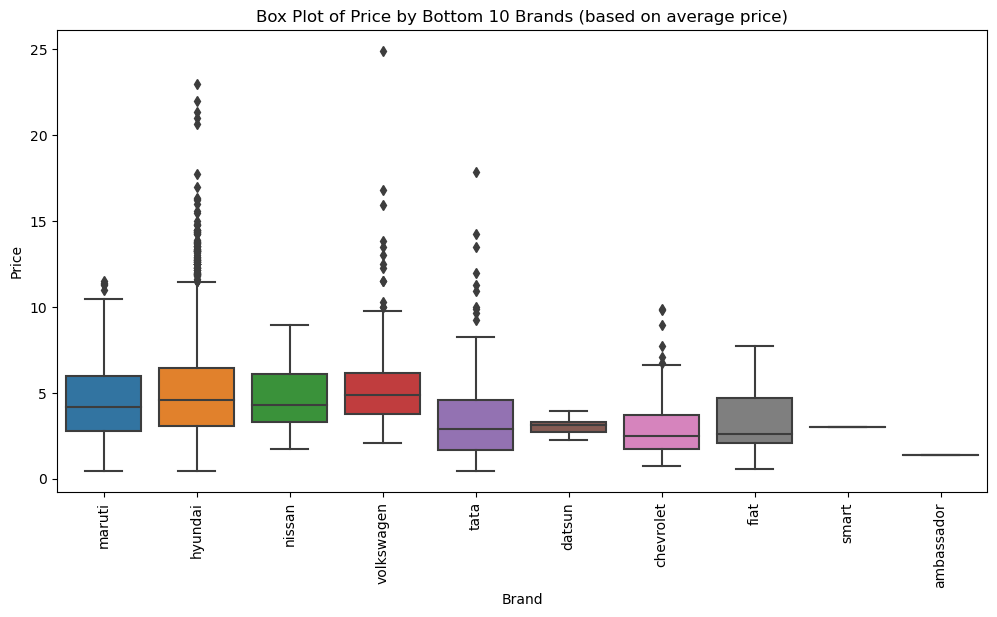

In [54]:
top_10_brands = df.groupby('Brand')['Price'].mean().nsmallest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x=df[df['Brand'].isin(top_10_brands)]['Brand'], y=df['Price'])
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Box Plot of Price by Bottom 10 Brands (based on average price)')
plt.show()

#### **Observations and Insights: **
- Audi, Land, Mercedez-Benz, BMW, Porsche, Jaguar, Volvo, mini, Bentley and lamborghini are in general the most expensive brands 
-While Maruti, Hyundai, Nissa, VW, Tata, Datsun, Chevrolet, Fiat, Smart and Ambassador are the bottom 10 cheap brands.

### **Missing value treatment**

In [55]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Price_log,Year_log,Power_log,Engine_log,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,7.605890,4.063198,6.905753,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,7.608374,4.837868,7.366445,hyundai,creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,7.606387,4.485260,7.089243,honda,jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,7.606885,4.485936,7.129298,maruti,ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,7.607381,4.947340,7.584773,audi,a4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,NaN,7.606387,4.640537,7.376508,volkswagen,vento
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,NaN,7.608374,4.640537,7.087574,volkswagen,polo
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,NaN,7.606885,4.144721,7.286876,nissan,micra
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,NaN,7.607381,4.640537,7.087574,volkswagen,polo


In [56]:
df = df.drop(['Kilometers_Driven', 'Year', 'Power', 'Engine'], axis=1)

In [57]:
# Now check the missing values of each column. Hint: Use isnull() method
df.isnull().sum()

Name                        0
Location                    0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Seats                      53
New_price                6246
Price                    1234
Kilometers_Driven_log       0
Price_log                1234
Year_log                    0
Power_log                 175
Engine_log                 46
Brand                       0
Model                       0
dtype: int64

Since Price_Log is the independant variable, it is safe to eliminate the 1234 rows.

In [58]:
df.dropna(subset=["Price_log"], inplace=True)

In [59]:
df.shape

(6018, 16)

In [60]:
print(df.Price_log.isnull().sum())

0


**Missing values for Mileage**

In [61]:
# Now check missing values of each column. Hint: Use isnull() method
print(df.Mileage.isnull().sum())
df[df.Mileage.isnull()]

2


,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,Kilometers_Driven_log,Price_log,Year_log,Power_log,Engine_log,Brand,Model
4446,Mahindra E Verito D4,Chennai,Electric,Automatic,First,NaN,5.0,13.58,13.00,10.819778,2.564949,7.608871,3.713572,4.276666,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,Electric,Automatic,First,NaN,5.0,NaN,12.75,10.691945,2.545531,7.606387,4.290459,7.494430,toyota,prius


In [62]:
df[df['Fuel_Type'] == 'Electric']


,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,Kilometers_Driven_log,Price_log,Year_log,Power_log,Engine_log,Brand,Model
4446,Mahindra E Verito D4,Chennai,Electric,Automatic,First,NaN,5.0,13.58,13.00,10.819778,2.564949,7.608871,3.713572,4.276666,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,Electric,Automatic,First,NaN,5.0,NaN,12.75,10.691945,2.545531,7.606387,4.290459,7.494430,toyota,prius


The 2 empty rows are electric vehicles, but they don't have any value. I tried to look for other cars to copy same value, but it seems that we only have 2 electric cars in the data. For that reason I will drop this 2 rows.

In [63]:
# Impute missing Mileage. For example, use can use median or any other methods.
df.dropna(subset=["Mileage"], inplace=True)

In [64]:

print(df.Mileage.isnull().sum())

0


**Missing values for Engine**

In [65]:
# Impute missing values in the column Engine 
print(df.Engine_log.isnull().sum())
df[df.Engine_log.isnull()]

36


,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,Kilometers_Driven_log,Price_log,Year_log,Power_log,Engine_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,Petrol,Manual,First,0.00,NaN,NaN,2.95,11.002200,1.081805,7.604396,NaN,NaN,honda,city
208,Maruti Swift 1.3 VXi,Kolkata,Petrol,Manual,First,16.10,NaN,NaN,2.11,10.645449,0.746688,7.605890,NaN,NaN,maruti,swift
733,Maruti Swift 1.3 VXi,Chennai,Petrol,Manual,Third,16.10,NaN,NaN,1.75,11.490680,0.559616,7.603898,NaN,NaN,maruti,swift
749,Land Rover Range Rover 3.0 D,Mumbai,Diesel,Automatic,Second,0.00,NaN,NaN,26.50,10.915107,3.277145,7.604894,NaN,NaN,land,rover
1294,Honda City 1.3 DX,Delhi,Petrol,Manual,First,12.80,NaN,NaN,3.20,10.915179,1.163151,7.605392,NaN,NaN,honda,city
1327,Maruti Swift 1.3 ZXI,Hyderabad,Petrol,Manual,First,16.10,NaN,NaN,5.80,10.825661,1.757858,7.608374,NaN,NaN,maruti,swift
1385,Honda City 1.5 GXI,Pune,Petrol,Manual,Second,0.00,NaN,NaN,1.50,11.652687,0.405465,7.602900,NaN,NaN,honda,city
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,Petrol,Manual,First,0.00,NaN,NaN,40.88,11.142992,3.710641,7.604894,NaN,NaN,land,rover
2074,Maruti Swift 1.3 LXI,Pune,Petrol,Manual,First,16.10,NaN,NaN,3.15,10.096378,1.147402,7.606387,NaN,NaN,maruti,swift
2096,Hyundai Santro LP zipPlus,Coimbatore,Petrol,Manual,First,0.00,NaN,NaN,1.93,10.861803,0.657520,7.602900,NaN,NaN,hyundai,santro


Those rows with empty Engine_log, have also empty spaces in New_Price and Power. For that reason i will drop them.

In [66]:
# Drop Engine_Log with empty spaces
df.dropna(subset=["Engine_log"], inplace=True)

**Missing values for Power**

In [67]:
print(df.Power_log.isnull().sum())
df[df.Power_log.isnull()]

107


,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,Kilometers_Driven_log,Price_log,Year_log,Power_log,Engine_log,Brand,Model
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,Diesel,Manual,First,17.80,5.0,NaN,2.00,11.618285,0.693147,7.604894,NaN,7.243513,ford,fiesta
79,Hyundai Santro Xing XL,Hyderabad,Petrol,Manual,First,0.00,5.0,NaN,1.30,11.380434,0.262364,7.603399,NaN,6.990257,hyundai,santro
89,Hyundai Santro Xing XO,Hyderabad,Petrol,Manual,First,17.00,5.0,NaN,2.10,11.208368,0.741937,7.604396,NaN,6.990257,hyundai,santro
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,Petrol,Manual,Second,17.00,5.0,NaN,0.85,11.532728,-0.162519,7.603399,NaN,6.990257,hyundai,santro
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,Petrol,Manual,Third,17.00,5.0,NaN,1.67,11.299225,0.512824,7.604894,NaN,6.990257,hyundai,santro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,Petrol,Manual,Second,17.00,5.0,NaN,1.20,10.762149,0.182322,7.603898,NaN,6.990257,hyundai,santro
5893,Maruti Estilo LXI,Chennai,Petrol,Manual,Second,19.50,NaN,NaN,1.75,10.839581,0.559616,7.604894,NaN,6.966967,maruti,estilo
5925,Skoda Laura Classic 1.8 TSI,Pune,Petrol,Manual,First,17.50,5.0,NaN,2.85,11.350407,1.047319,7.605890,NaN,7.494430,skoda,laura
5943,Mahindra Jeep MM 540 DP,Chennai,Diesel,Manual,First,0.00,6.0,NaN,1.70,11.225243,0.530628,7.601902,NaN,7.655391,mahindra,jeep


Same criteria as with Engine_Log, I will drop them

In [68]:
# Impute missing values in the column Power
df.dropna(subset=["Power_log"], inplace=True)

**Missing values in Seats**

In [69]:
# Checking missing values in the column 'Seats'
print(df.Seats.isnull().sum())
df[df.Seats.isnull()]


2


,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,Kilometers_Driven_log,Price_log,Year_log,Power_log,Engine_log,Brand,Model
229,Ford Figo Diesel,Bangalore,Diesel,Manual,First,0.0,NaN,NaN,3.6,11.162460,1.280934,7.608374,4.59512,7.311886,ford,figo
1917,Honda City 1.5 EXI,Jaipur,Petrol,Manual,Second,13.0,NaN,NaN,1.7,11.385092,0.530628,7.603399,4.60517,7.308543,honda,city


Search for other Honda City

In [70]:
df[df["Model"]=="city"]

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,Kilometers_Driven_log,Price_log,Year_log,Power_log,Engine_log,Brand,Model
11,Honda City 1.5 V AT Sunroof,Kolkata,Petrol,Automatic,First,16.8,5.0,NaN,4.49,11.002100,1.501853,7.606885,4.756173,7.311218,honda,city
25,Honda City Corporate Edition,Mumbai,Petrol,Manual,First,16.8,5.0,NaN,4.25,10.857459,1.446919,7.606885,4.756173,7.311218,honda,city
66,Honda City ZX CVT,Mumbai,Petrol,Automatic,Second,16.4,5.0,NaN,1.85,11.050890,0.615186,7.604396,4.356709,7.311218,honda,city
85,Honda City i VTEC E,Delhi,Petrol,Manual,First,17.8,5.0,NaN,3.25,10.858999,1.178655,7.605392,4.764735,7.311218,honda,city
160,Honda City i DTEC V,Kochi,Diesel,Manual,First,26.0,5.0,NaN,7.11,10.665017,1.961502,7.608374,4.591071,7.311886,honda,city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,Honda City i-DTEC SV,Hyderabad,Diesel,Manual,First,25.6,5.0,13.33,8.00,11.314475,2.079442,7.608374,4.591071,7.311886,honda,city
5887,Honda City i DTEC VX Option,Bangalore,Diesel,Manual,First,25.1,5.0,NaN,10.25,10.491274,2.327278,7.608871,4.591071,7.311886,honda,city
5951,Honda City 1.5 V MT,Pune,Petrol,Manual,First,17.0,5.0,NaN,7.25,10.780913,1.981001,7.607878,4.770685,7.311218,honda,city
5957,Honda City 1.5 EXI,Coimbatore,Petrol,Manual,Second,13.0,5.0,NaN,1.76,12.137146,0.565314,7.602900,4.605170,7.308543,honda,city


In [71]:
df[df["Model"]=="figo"]

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_price,Price,Kilometers_Driven_log,Price_log,Year_log,Power_log,Engine_log,Brand,Model
61,Ford Figo Diesel Titanium,Bangalore,Diesel,Manual,First,20.00,5.0,NaN,2.75,11.184421,1.011601,7.605890,4.219508,7.243513,ford,figo
83,Ford Figo Diesel ZXI,Hyderabad,Diesel,Manual,First,20.00,5.0,NaN,2.80,11.161053,1.029619,7.606885,4.219508,7.243513,ford,figo
167,Ford Figo Diesel Titanium,Jaipur,Diesel,Manual,Second,20.00,5.0,NaN,2.10,11.099272,0.741937,7.605890,4.219508,7.243513,ford,figo
192,Ford Figo Diesel ZXI,Chennai,Diesel,Manual,First,20.00,5.0,NaN,2.60,11.695247,0.955511,7.605890,4.219508,7.243513,ford,figo
229,Ford Figo Diesel,Bangalore,Diesel,Manual,First,0.00,NaN,NaN,3.60,11.162460,1.280934,7.608374,4.595120,7.311886,ford,figo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,Ford Figo Petrol ZXI,Coimbatore,Petrol,Manual,First,15.60,5.0,NaN,3.62,11.231411,1.286474,7.606885,4.248495,7.086738,ford,figo
5817,Ford Figo Aspire 1.5 TDCi Titanium,Chennai,Diesel,Manual,First,25.83,5.0,NaN,5.75,10.526588,1.749200,7.608871,4.595120,7.311886,ford,figo
5849,Ford Figo 1.5D Trend MT,Pune,Diesel,Manual,First,25.83,5.0,NaN,4.50,11.652687,1.504077,7.608871,4.595120,7.311886,ford,figo
5938,Ford Figo Aspire 1.5 TDCi Titanium Plus,Kochi,Diesel,Manual,First,25.83,5.0,NaN,6.22,10.420911,1.827770,7.608871,4.595120,7.311886,ford,figo


In [72]:
# Impute missing values in Seats,you can use fillna method in pandas
df["Seats"].fillna(5, inplace=True)


In [73]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
df.isnull().sum()

Name                        0
Location                    0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Seats                       0
New_price                5050
Price                       0
Kilometers_Driven_log       0
Price_log                   0
Year_log                    0
Power_log                   0
Engine_log                  0
Brand                       0
Model                       0
dtype: int64

**Missing values for New_price**

Considering that 5050 rows are empty for New_Price, I will drop the column this time.

In [74]:
# Impute missing values in the column New_price
df.drop(["New_price"], axis=1, inplace=True)

In [75]:
# Check the null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5873 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   5873 non-null   object 
 1   Location               5873 non-null   object 
 2   Fuel_Type              5873 non-null   object 
 3   Transmission           5873 non-null   object 
 4   Owner_Type             5873 non-null   object 
 5   Mileage                5873 non-null   float64
 6   Seats                  5873 non-null   float64
 7   Price                  5873 non-null   float64
 8   Kilometers_Driven_log  5873 non-null   float64
 9   Price_log              5873 non-null   float64
 10  Year_log               5873 non-null   float64
 11  Power_log              5873 non-null   float64
 12  Engine_log             5873 non-null   float64
 13  Brand                  5873 non-null   object 
 14  Model                  5873 non-null   object 
dtypes: f

I still had a doubt on the milage, because I saw some cars with milage== 0, which is imposible!!

In [76]:
df[df["Mileage"]==0].shape

(29, 15)

In [77]:
df = df[df['Mileage'] != 0]

In [78]:
df[df["Mileage"]==0].shape

(0, 15)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5844 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   5844 non-null   object 
 1   Location               5844 non-null   object 
 2   Fuel_Type              5844 non-null   object 
 3   Transmission           5844 non-null   object 
 4   Owner_Type             5844 non-null   object 
 5   Mileage                5844 non-null   float64
 6   Seats                  5844 non-null   float64
 7   Price                  5844 non-null   float64
 8   Kilometers_Driven_log  5844 non-null   float64
 9   Price_log              5844 non-null   float64
 10  Year_log               5844 non-null   float64
 11  Power_log              5844 non-null   float64
 12  Engine_log             5844 non-null   float64
 13  Brand                  5844 non-null   object 
 14  Model                  5844 non-null   object 
dtypes: f

In [106]:
df.tail()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,Kilometers_Driven_log,Price_log,Year_log,Power_log,Engine_log,Brand,Model
5839,Maruti Swift VDI,Delhi,Diesel,Manual,First,28.40,5.0,4.75,10.217020,1.558145,7.607878,4.304065,7.129298,maruti,swift
5840,Hyundai Xcent 1.1 CRDi S,Jaipur,Diesel,Manual,First,24.40,5.0,4.00,11.512925,1.386294,7.608374,4.262680,7.021084,hyundai,xcent
5841,Mahindra Xylo D4 BSIV,Jaipur,Diesel,Manual,Second,14.00,8.0,2.90,10.915088,1.064711,7.606885,4.718499,7.823246,mahindra,xylo
5842,Maruti Wagon R VXI,Kolkata,Petrol,Manual,First,18.90,5.0,2.65,10.736397,0.974560,7.607381,4.206184,6.905753,maruti,wagon
5843,Chevrolet Beat Diesel,Hyderabad,Diesel,Manual,First,25.44,5.0,2.50,10.757903,0.916291,7.606387,4.053523,6.841615,chevrolet,beat


## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [80]:
# Step-1
X = df.drop(['Name','Price','Price_log','Kilometers_Driven_log'], axis = 1)

y = df[["Price_log", "Price"]]

In [81]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(4090, 250) (1754, 250)


In [84]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [85]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [86]:
# Create a linear regression model
lr = LinearRegression()

In [87]:
# Fit linear regression model
lr.fit(X_train, y_train['Price_log']) 

LinearRegression()

In [88]:
from sklearn import metrics

In [89]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.9194660203884726
R-square on test set :  0.9227462281357365
RMSE on training set :  3.237250735444337
RMSE on test set :  2.938091545552566


**Observations from results: _____**

**Important variables of Linear Regression**

Building a model using statsmodels.

In [90]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     407.9
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:06:06   Log-Likelihood:                 1330.5
No. Observations:                4090   AIC:                            -2217.
Df Residuals:                    3868   BIC:                            -814.7
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [91]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [92]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Location_Pune,-0.036581,0.040293
Location_Kochi,-0.044983,0.011178
Model_5,0.362534,0.005348
Model_x3,0.396094,0.004661
Owner_Type_Fourth & Above,-0.299219,0.004534
...,...,...
Model_jetta,-6.283839,0.000000
Model_kuv,-4.077127,0.000000
Model_kwid,-6.858323,0.000000
Model_lancer,-11.579365,0.000000


In [93]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Location', 'Model', 'Owner_Type', 'Brand', 'Transmission', 'Power_log', 'Year_log']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [94]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [95]:
# Create a Ridge regression model
X = df.drop(columns=['Price', 'Price_log','Name', 'Kilometers_Driven_log'])  # Replace 'target' with the actual column name for the target variable
y = df['Price_log']

X = pd.get_dummies(X, drop_first = True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scale the features for regularization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Set the regularization strength (alpha)

# Train the model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.035932631124988
R-squared (R2): 0.95091658378838


**Observations from results: _____**

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [97]:
df.tail()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,Kilometers_Driven_log,Price_log,Year_log,Power_log,Engine_log,Brand,Model
6014,Maruti Swift VDI,Delhi,Diesel,Manual,First,28.40,5.0,4.75,10.217020,1.558145,7.607878,4.304065,7.129298,maruti,swift
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,Diesel,Manual,First,24.40,5.0,4.00,11.512925,1.386294,7.608374,4.262680,7.021084,hyundai,xcent
6016,Mahindra Xylo D4 BSIV,Jaipur,Diesel,Manual,Second,14.00,8.0,2.90,10.915088,1.064711,7.606885,4.718499,7.823246,mahindra,xylo
6017,Maruti Wagon R VXI,Kolkata,Petrol,Manual,First,18.90,5.0,2.65,10.736397,0.974560,7.607381,4.206184,6.905753,maruti,wagon
6018,Chevrolet Beat Diesel,Hyderabad,Diesel,Manual,First,25.44,5.0,2.50,10.757903,0.916291,7.606387,4.053523,6.841615,chevrolet,beat


In [98]:
df.index
df.reset_index(drop=True, inplace=True)

In [99]:
X = df.drop(columns=['Price', 'Price_log', 'Name', 'Kilometers_Driven_log'])
y = df['Price_log']

# Handle missing values in the DataFrame (if any)
X = X.dropna()
y = y.loc[X.index]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]).toarray(),
                         columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded categorical columns with the remaining numeric columns
X_combined = pd.concat([X_encoded, X.select_dtypes(include=['float64', 'int64'])], axis=1)

# Reset the indices of features and target variable
X_combined.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=1)

# Create a Decision Tree regression model
tree_model = DecisionTreeRegressor(random_state=1)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.071606235593147
R-squared (R2): 0.9021869939682319


**Observations from results: _____**

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


**Observations and insights: _____**

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [100]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


In [101]:
X

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Year_log,Power_log,Engine_log,Brand,Model
0,Mumbai,CNG,Manual,First,26.60,5.0,7.605890,4.063198,6.905753,maruti,wagon
1,Pune,Diesel,Manual,First,19.67,5.0,7.608374,4.837868,7.366445,hyundai,creta
2,Chennai,Petrol,Manual,First,18.20,5.0,7.606387,4.485260,7.089243,honda,jazz
3,Chennai,Diesel,Manual,First,20.77,7.0,7.606885,4.485936,7.129298,maruti,ertiga
4,Coimbatore,Diesel,Automatic,Second,15.20,5.0,7.607381,4.947340,7.584773,audi,a4
...,...,...,...,...,...,...,...,...,...,...,...
5839,Delhi,Diesel,Manual,First,28.40,5.0,7.607878,4.304065,7.129298,maruti,swift
5840,Jaipur,Diesel,Manual,First,24.40,5.0,7.608374,4.262680,7.021084,hyundai,xcent
5841,Jaipur,Diesel,Manual,Second,14.00,8.0,7.606885,4.718499,7.823246,mahindra,xylo
5842,Kolkata,Petrol,Manual,First,18.90,5.0,7.607381,4.206184,6.905753,maruti,wagon


In [102]:
# # Load the dataframe
# # Create the feature matrix X and target variable y
# X = df.drop(columns=['Price', 'Price_log', 'Name', 'Kilometers_Driven_log'])
# y = df['Price_log']

# # Perform one-hot encoding on categorical variables
# X_encoded = pd.get_dummies(X, columns=['Brand', 'Location', 'Fuel_Type','Transmission', 'Owner_Type','Brand','Model'])

# # Split the encoded data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Create a random forest regressor
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# # Train the regressor on the training data
# rf_regressor.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = rf_regressor.predict(X_test)

In [103]:
# Get score of the model

# from sklearn.metrics import mean_absolute_error, r2_score

# # Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_test, y_pred)
# print("Mean Absolute Error:", mae)

# # Calculate R-squared (R2)
# r2 = r2_score(y_test, y_pred)
# print("R-squared:", r2)

**Observations and insights: _____**

**Feature Importance**

In [104]:
# Print important features similar to decision trees
importance_scores = rf_regressor.feature_importances_
feature_names = X.columns

# Create a dictionary mapping feature names to importance scores
feature_importances = dict(zip(feature_names, importance_scores))

# Sort the features based on their importance scores in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the sorted features and their importance scores
print("Important Features:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

NameError: name 'rf_regressor' is not defined

**Observations and insights: _____**

### **Hyperparameter Tuning: Decision Tree**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {
    'criterion': ['mse', 'mae'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

In [ ]:
# Get score of the dtree_tuned
score = dtree_tuned.score(X_test, y_test)
print("Score of dtree_tuned: {:.2f}".format(score))

**Observations and insights: _____**

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees

**Observations and insights: _____**

### **Hyperparameter Tuning: Random Forest**

In [ ]:
# Choose the type of Regressor

# Define the parameters for Grid to choose from 

# Check documentation for all the parametrs that the model takes and play with those

# Type of scoring used to compare parameter combinations

# Run the grid search

# Set the model to the best combination of parameters

# Fit the best algorithm to the data

In [ ]:
# Get score of the model

**Observations and insights: _____**

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees

**Observations and insights: ______**

**Observations: _____**

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [ ]:
# Defining list of models you have trained
models = [lr, dtree, __________________]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', ___________, ___________], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt? What are expected benefits and costs (assume numbers) of this solution design?